In [1]:
%%time
%load_ext autoreload
from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "/Users/Akshay/Documents/tRNAShuffle/data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 49.1 s, sys: 1.14 s, total: 50.3 s
Wall time: 53.4 s


## Wildtype

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
R^2:  0.3624675731274821
slope:  1.1129143869335598
192.1635141503441
Min. transcript elongation latency:  173.30979709187505
Max. transcript elongation latency:  216.05581405700906
Standard deviation of elongation latency distrib:   5.425179172402708


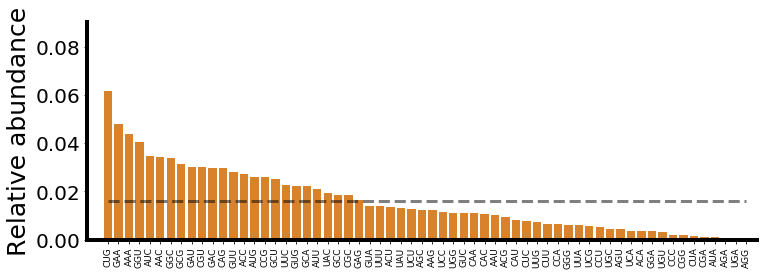

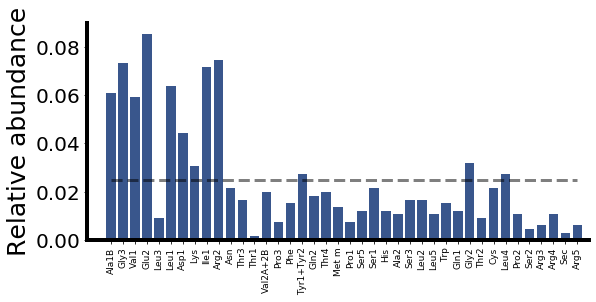

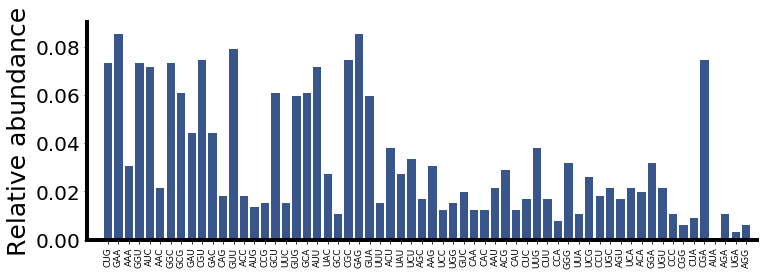

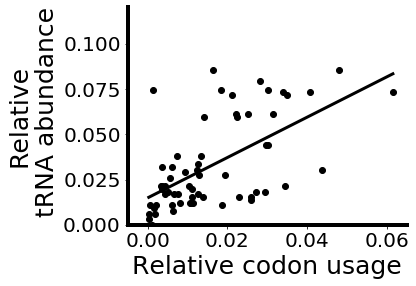

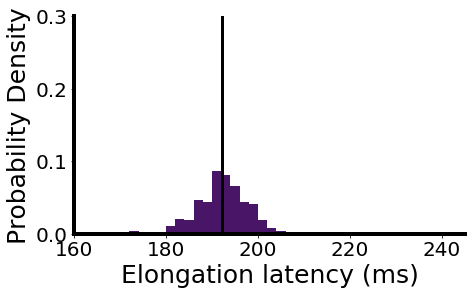

In [2]:
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Plot codon frequency sorted by decreasing frequency
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),pCodon_sorted,color='#d8832b',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax.set_xlim(-2,62)
ax.set_ylabel('Relative abundance',fontsize=25)


#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=25)
ptRNA_sorted_WT = ptRNA_sorted
tRNA_sorted_WT = tRNA_sorted



## Sort and plot cognate tRNA distribution per codon 
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),ptRNA_sorted,color='#39568CFF',width=0.8)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('Relative abundance',fontsize=25)

for ax in [ax,ax1,ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)
   # ax.set_yticks(np.arange(0,0.36,0.05))



####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
ax3.scatter(pCodon_sorted,ptRNA_sorted,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_sorted,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_sorted,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_sorted,1)
print("slope: ", slope)
ax3.set_xlim(-0.005,0.065)
ax3.set_ylim(0,0.12)
ax3.set_xlabel('Relative codon usage',fontsize=25)
ax3.set_ylabel('Relative\n tRNA abundance',fontsize=25)


#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))
transcriptome_elongt_WT = transcriptome_elongt

hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(170,230),density=True)
print(np.average(transcriptome_elongt))
ax4.plot([np.average(transcriptome_elongt_WT)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')

ax4.set_ylim(0,0.3)
ax4.set_xlim(160,245)

ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax3,ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    
print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

In [3]:
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)

pCodon_transcriptome, transcriptome_elongt,gene_list =compute_transcript_distributions_subset(gene_map,gene_latency,178)
print(gene_list)

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  153
['rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rp

## Uniform

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
R^2:  0.016511070132998018
slope:  0.10795079542582078
214.3387013936908
1.1153974902124102
(2.0322378716744915, 0.9715179968701095)
(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.69822401e-04, 3.81124141e-02,
       1.33212083e

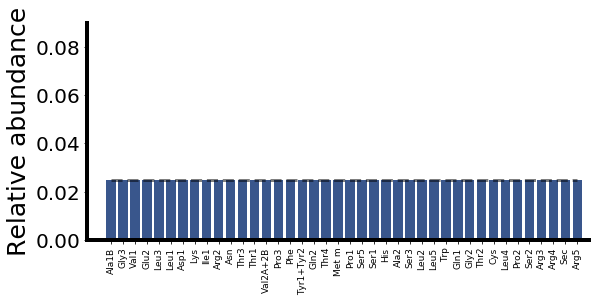

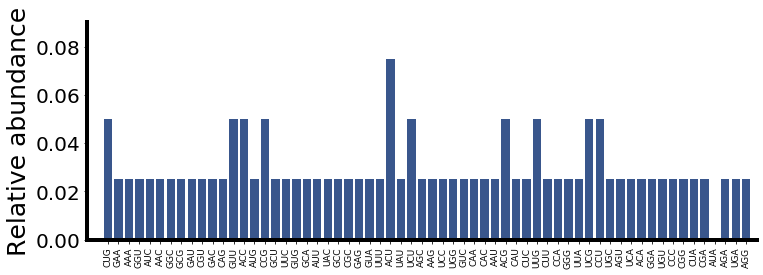

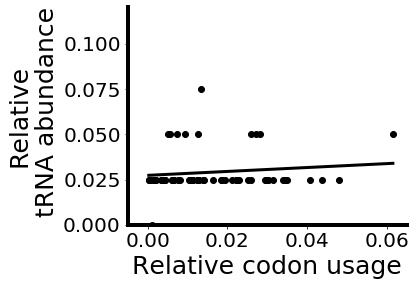

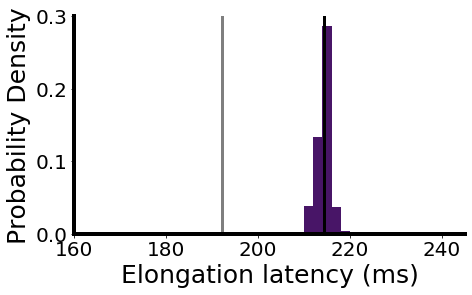

In [4]:
#Uniform
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(ptRNA_uniform, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_uniform,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = ptRNA_uniform[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=25)
ptRNA_sorted_uniform = ptRNA_sorted

## Sort and plot cognate tRNA distribution per codon 
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),ptRNA_sorted,color='#39568CFF',width=0.8)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('Relative abundance',fontsize=25)

for ax in [ax1,ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)
   # ax.set_yticks(np.arange(0,0.36,0.05))

####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
ax3.scatter(pCodon_sorted,ptRNA_sorted,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_sorted,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_sorted,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_sorted,1)
print("slope: ", slope)
ax3.set_xlim(-0.005,0.065)
ax3.set_ylim(0,0.12)
ax3.set_xlabel('Relative codon usage',fontsize=25)
ax3.set_ylabel('Relative\n tRNA abundance',fontsize=25)


#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))

hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(180,240),density=True)
ax4.plot([np.average(transcriptome_elongt)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')
ax4.plot([np.average(transcriptome_elongt_WT)]*100,np.linspace(0,0.4,100),linewidth=3,color='black',alpha=0.5)

print(np.average(transcriptome_elongt))
ax4.set_ylim(0,0.3)
ax4.set_xlim(160,245)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax3,ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))
print(hist)

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

## monotonic increase

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in

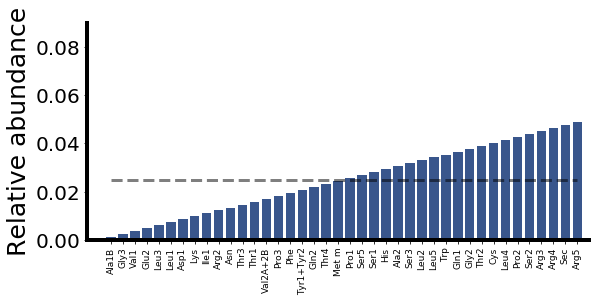

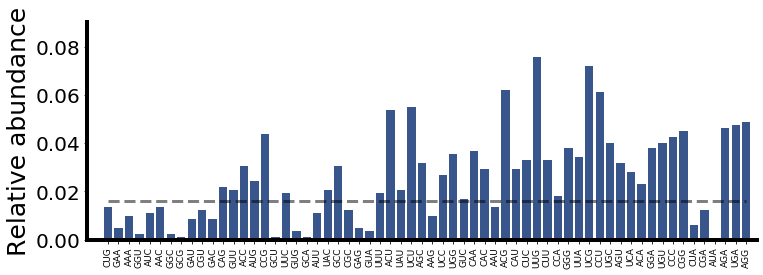

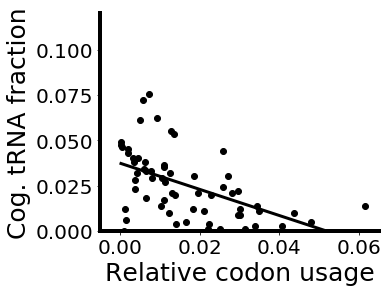

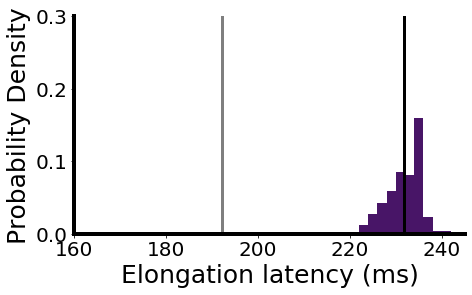

In [5]:
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


###Compute sorting for monotonic increase
##Compute WT transcriptome-ordered tRNA 
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to transcriptome-sorted tRNA
ptRNA_sorted = (0.12195+np.arange(0,40)*0.12195)/sum(0.12195+np.arange(0,40)*0.12195)
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(resortedtRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(resortedtRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=25)
ptRNA_sorted_anticorrelated = ptRNA_sorted

## Sort and plot cognate tRNA distribution per codon 
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),ptRNA_sorted,color='#39568CFF',width=0.8)
ax1.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('Relative abundance',fontsize=25)

for ax in [ax1,ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)


####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
ax3.scatter(pCodon_sorted,ptRNA_sorted,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_sorted,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_sorted,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_sorted,1)
print("slope: ", slope)
ax3.set_xlim(-0.005,0.065)
ax3.set_ylim(0,0.12)
ax3.set_xlabel('Relative codon usage',fontsize=25)
ax3.set_ylabel('Cog. tRNA fraction',fontsize=25)


#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))

hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(210,270),density=True)

ax4.plot([np.average(transcriptome_elongt)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')
ax4.plot([np.average(transcriptome_elongt_WT)]*100,np.linspace(0,0.4,100),linewidth=3,color='black',alpha=0.5)

print(np.average(transcriptome_elongt))
ax4.set_ylim(0,0.3)
ax4.set_xlim(160,245)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax3,ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    
print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

## Monotonic decrease

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in

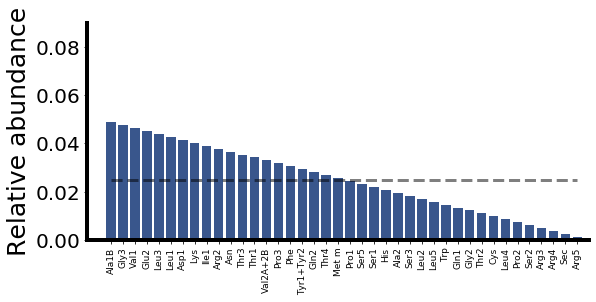

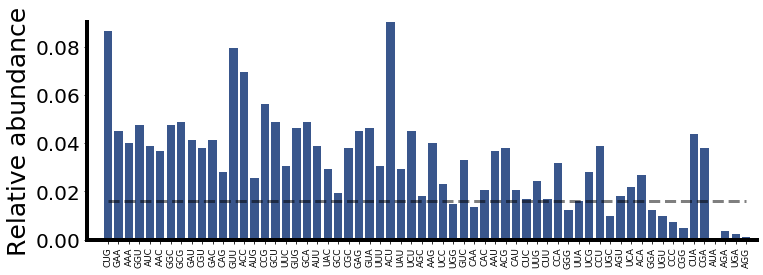

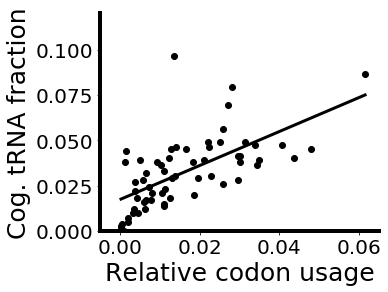

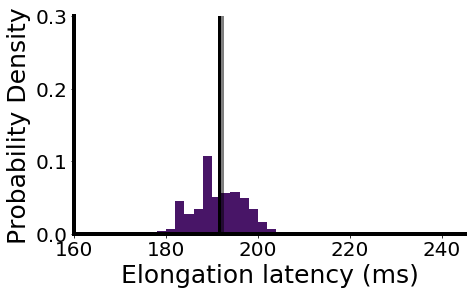

In [6]:
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


###Compute sorting for monotonic increase
##Compute WT transcriptome-ordered tRNA 
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to transcriptome-sorted tRNA
ptRNA_sorted = np.flip(0.12195+np.arange(0,40)*0.12195)/sum(0.12195+np.arange(0,40)*0.12195)
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(resortedtRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(resortedtRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=25)
ptRNA_sorted_correlated = ptRNA_sorted

## Sort and plot cognate tRNA distribution per codon 
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),ptRNA_sorted,color='#39568CFF',width=0.8)
ax1.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('Relative abundance',fontsize=25)

for ax in [ax1,ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)


####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
ax3.scatter(pCodon_sorted,ptRNA_sorted,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_sorted,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_sorted,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_sorted,1)
print("slope: ", slope)
ax3.set_xlim(-0.005,0.065)
ax3.set_ylim(0,0.12)
ax3.set_xlabel('Relative codon usage',fontsize=25)
ax3.set_ylabel('Cog. tRNA fraction',fontsize=25)


#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))

hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(160,220),density=True)
ax4.plot([np.average(transcriptome_elongt)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')
ax4.plot([np.average(transcriptome_elongt_WT)]*100,np.linspace(0,0.4,100),linewidth=3,color='black',alpha=0.5)


print(np.average(transcriptome_elongt))
ax4.set_ylim(0,0.3)
ax4.set_xlim(160,245)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax3,ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


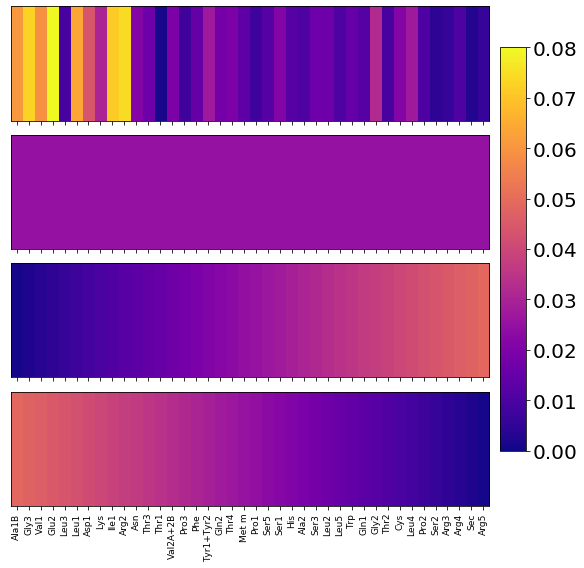

In [7]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(nrows=4, sharex=True,figsize=(7,8))


x = np.arange(0,40)
y = np.array(ptRNA_sorted_WT)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

x = np.arange(0,40)
y = np.array(ptRNA_sorted_uniform)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])

x = np.arange(0,40)
y = np.array(ptRNA_sorted_anticorrelated)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])

x = np.arange(0,40)
y = np.array(ptRNA_sorted_correlated)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax4.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax4.set_yticks([])
ax4.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.21, 0.05, 0.7])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()    

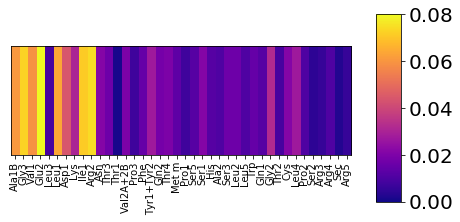

0.0015220700152021665


In [8]:
fig, ax = plt.subplots(figsize=(7,2))


x = np.arange(0,40)
y = np.array(ptRNA_sorted_WT)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.show()
print(min(y))

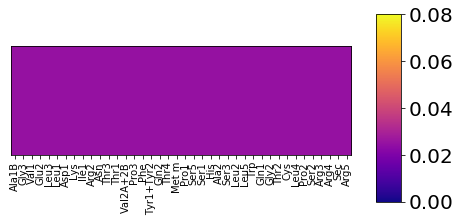

0.025


In [9]:
fig, ax = plt.subplots(figsize=(7,2))


x = np.arange(0,40)
y = np.array(ptRNA_sorted_uniform)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.show()    
print(min(y))

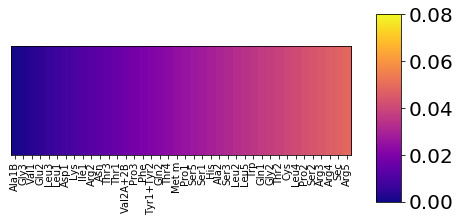

0.0012195121951219512


In [10]:
fig, ax = plt.subplots(figsize=(7,2))


x = np.arange(0,40)
y = np.array(ptRNA_sorted_anticorrelated)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.show()    
print(min(y))

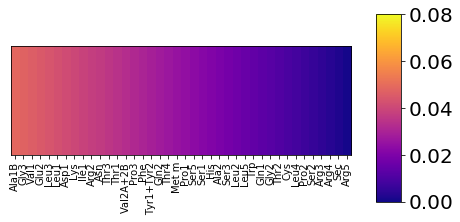

0.0012195121951219512


In [11]:
fig, ax = plt.subplots(figsize=(7,2))

x = np.arange(0,40)
y = np.array(ptRNA_sorted_correlated)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.show()    
print(min(y))

In [12]:
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
extent

[-0.5, 39.5, 0, 1]

## Codon weighted correlated

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in

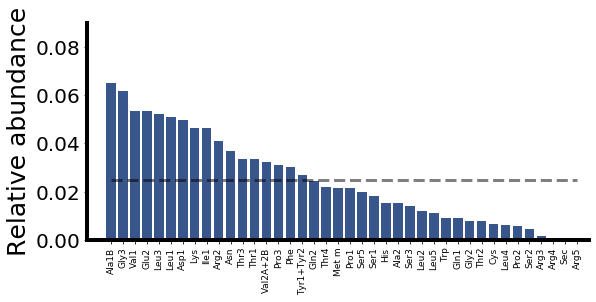

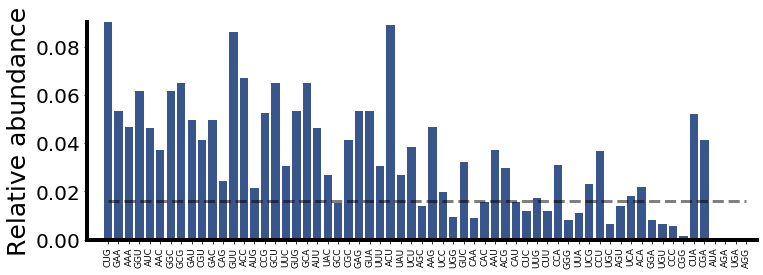

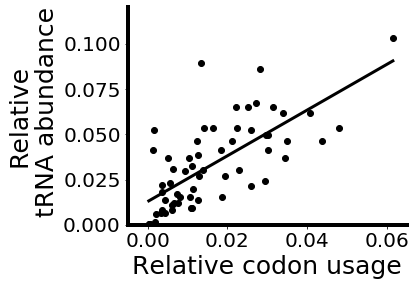

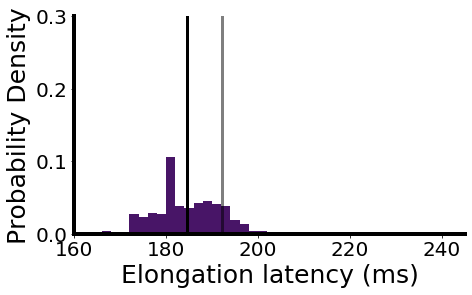

In [13]:
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


###Compute sorting for monotonic increase
##Compute WT transcriptome-ordered tRNA 
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to transcriptome-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
sortedtRNAdict = dict(zip(tRNA_sorted, ptRNA_sorted))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(resortedtRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(resortedtRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=25)
ptRNA_sorted_correlatedCodon = ptRNA_sorted

## Sort and plot cognate tRNA distribution per codon 
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),ptRNA_sorted,color='#39568CFF',width=0.8)
ax1.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('Relative abundance',fontsize=25)

for ax in [ax1,ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)


####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
ax3.scatter(pCodon_sorted,ptRNA_sorted,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_sorted,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_sorted,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_sorted,1)
print("slope: ", slope)
ax3.set_xlim(-0.005,0.065)
ax3.set_ylim(0,0.12)
ax3.set_xlabel('Relative codon usage',fontsize=25)
ax3.set_ylabel('Relative\n tRNA abundance',fontsize=25)


#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))

hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(160,220),density=True)
ax4.plot([np.average(transcriptome_elongt)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')
ax4.plot([np.average(transcriptome_elongt_WT)]*100,np.linspace(0,0.4,100),linewidth=3,color='black',alpha=0.5)


print(np.average(transcriptome_elongt))
ax4.set_ylim(0,0.3)
ax4.set_xlim(160,245)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax3,ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

In [14]:
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)

pCodon_transcriptome, transcriptome_elongt,gene_list =compute_transcript_distributions_subset(gene_map,gene_latency,178)
print(gene_list)

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  153
['rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rplL', 'rp

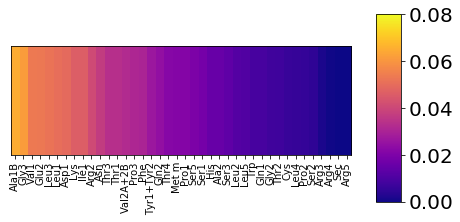

0.00023243607315527238


In [15]:
fig, ax = plt.subplots(figsize=(7,2))

x = np.arange(0,40)
y = np.array(ptRNA_sorted_correlatedCodon)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.show()    
print(min(y))

## Codon-weighted anticorrelated

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in

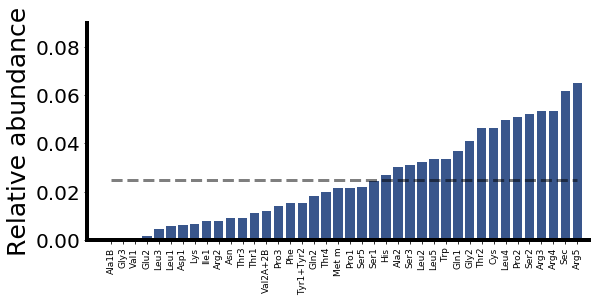

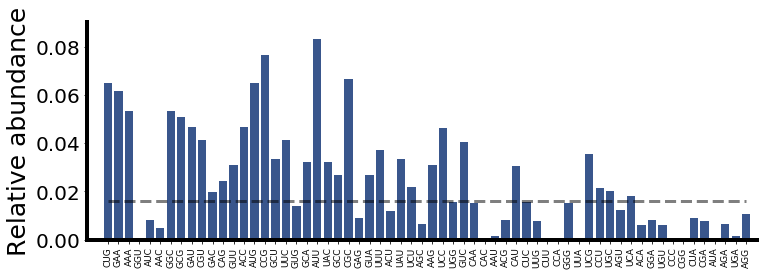

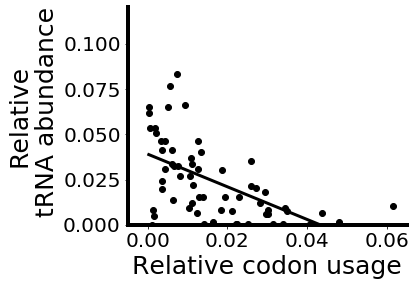

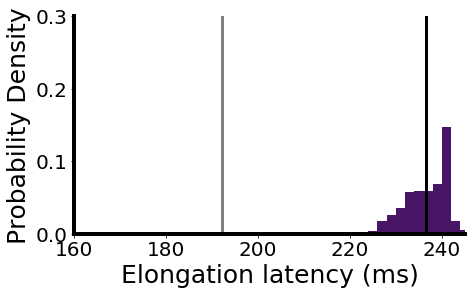

In [16]:
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


###Compute sorting for monotonic increase
##Compute WT transcriptome-ordered tRNA 
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]

##Assign monotonic increase to transcriptome-sorted tRNA
ptRNA_sorted = tRNA_weightedbycodon[tRNA_sorted_indices]
sortedtRNAdict = dict(zip(tRNA_sorted, np.flip(ptRNA_sorted)))
resortedtRNA = [sortedtRNAdict[tRNA] for tRNA in tRNA_tags]

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(resortedtRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(resortedtRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
fig,ax2 = plt.subplots(figsize=(9,4))
ax2.bar(np.arange(40),np.flip(ptRNA_sorted),color='#39568CFF',width=0.8)
ax2.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax2.set_xlim(-2,40)
ax2.set_ylabel('Relative abundance',fontsize=25)
ptRNA_sorted_anticorrelatedCodon = np.flip(ptRNA_sorted)

## Sort and plot cognate tRNA distribution per codon 
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_sorted = [sum([ptRNA_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),np.flip(ptRNA_sorted),color='#39568CFF',width=0.8)
ax1.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax1.set_xlim(-2,62)
ax1.set_ylabel('Relative abundance',fontsize=25)

for ax in [ax1,ax2]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.09)


####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
ax3.scatter(pCodon_sorted,(ptRNA_sorted),color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,(ptRNA_sorted),1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,(ptRNA_sorted),y_hat))

slope, intercept = np.polyfit(pCodon_sorted,(ptRNA_sorted),1)
print("slope: ", slope)
ax3.set_xlim(-0.005,0.065)
ax3.set_ylim(0,0.12)
ax3.set_xlabel('Relative codon usage',fontsize=25)
ax3.set_ylabel('Relative\n tRNA abundance',fontsize=25)


#Plot the elongation latency of each gene
fig,ax4 = plt.subplots(figsize=(7,4))

hist=ax4.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(210,270),density=True)
ax4.plot([np.average(transcriptome_elongt)]*100,np.linspace(0,0.4,100),linewidth=3,color='black')
ax4.plot([np.average(transcriptome_elongt_WT)]*100,np.linspace(0,0.4,100),linewidth=3,color='black',alpha=0.5)


print(np.average(transcriptome_elongt))
ax4.set_ylim(0,0.3)
ax4.set_xlim(160,245)
ax4.set_xlabel('Elongation latency (ms)',size=25)
ax4.set_ylabel('Probability Density',size=25)

for ax in [ax3,ax4]:
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))

print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

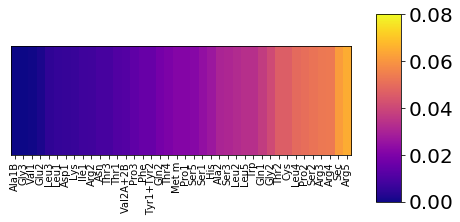

0.00023243607315527238


In [17]:
fig, ax = plt.subplots(figsize=(7,2))

x = np.arange(0,40)
y = np.array(ptRNA_sorted_anticorrelatedCodon)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.08)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

plt.xticks(range(len(tRNA_tags)), tRNA_sorted_WT,rotation='vertical')
ax4.tick_params(axis='x', which='major', labelsize=9)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, -0.2, 0.05, 1.3])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.show()    
print(min(y))